In [1]:
# pip install --upgrade git+https://github.com/hyk2202/helper.git

import pandas as pd
from helper.util import *
from helper.analysis import *
from helper.tensor import *
from helper.plot import *
from helper.timeserise import *
from helper.core import *
from helper.classification import *
from helper.re import *
from helper.regression import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yjg10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
origin = my_read_data('데이터_전처리_최종.xlsx',info=False, index_col='IDX')

In [3]:
df = origin.copy()
df.columns

Index(['발생날짜', '요일', '공휴일여부', '오전오후', '시간대', '시간', '사고인지 시간', '공공/민간 구분', '날씨',
       '기온', '습도', '인적사고', '보호(방호)조치여부 - 안전방호', '보호(방호)조치여부 - 개인방호', '공종_대분류',
       '공종_중분류', '사고객체_대분류', '사고객체_중분류', '작업프로세스', '장소_대분류', '장소_중분류',
       '부위_대분류', '부위_중분류', '사고원인_주원인', '사상자수', '사고신고사유_부상', '사고신고사유_사망',
       '사고신고사유_물적', '시', '전체공사비', '전체공사비_분류', '해당공종_공사비', '구체적 사고원인',
       '사고발생후 조치사항', '공사기간_시작일', '공사기간_종료일', '공종_시작일', '공종_종료일', '재발방지대책',
       '공정률', '안전관리계획', '설계안전성검토', '작업자수', '지점 번호', '관측소', '기온.1', '강수량', '풍속',
       '풍향', '습도.1', '증기압', '이슬점온도', '현지기압', '해면기압', '일조', '전운량', '중하층운량',
       '시정', '지면온도'],
      dtype='object')

In [4]:
df.dtypes

발생날짜                 datetime64[ns]
요일                           object
공휴일여부                        object
오전오후                         object
시간대                           int64
시간                           object
사고인지 시간                      object
공공/민간 구분                     object
날씨                           object
기온                           object
습도                          float64
인적사고                         object
보호(방호)조치여부 - 안전방호            object
보호(방호)조치여부 - 개인방호            object
공종_대분류                       object
공종_중분류                       object
사고객체_대분류                     object
사고객체_중분류                     object
작업프로세스                       object
장소_대분류                       object
장소_중분류                       object
부위_대분류                       object
부위_중분류                       object
사고원인_주원인                     object
사상자수                          int64
사고신고사유_부상                    object
사고신고사유_사망                    object
사고신고사유_물적                   

In [5]:
temp = []
for i in df['인적사고']:
    if i == '기타':temp.append('분류불능')
    elif i == '없음':temp.append(None)
    else:temp.append(i)

df['인적사고'] = temp
df2 = df.query("인적사고 != '분류불능'")
df2['인적사고'].value_counts()

넘어짐       5814
떨어짐       4321
물체에 맞음    3509
끼임        2576
부딪힘       1850
절단, 베임    1688
깔림         521
질병         381
찔림         307
화상         186
교통사고       123
감전          48
질식          18
Name: 인적사고, dtype: int64

In [6]:
temp =[]
for i in df2['강수량']:
    if i>=0.1 : temp.append(1)
    else:temp.append(0)
df2['강수량'] = temp

In [7]:
# 결측치 : 0 정규작업 :1 그외: 2

temp = []
for i in df2['사고인지 시간'].fillna(0):
    if i == 0 : temp.append(0)
    elif i == '정규작업 ': temp.append(1)
    else:temp.append(2)

df2['사고인지 시간'] = temp
df2['사고인지 시간'].value_counts()

1    16599
0     2716
2     2255
Name: 사고인지 시간, dtype: int64

In [8]:
# 결측치 : 0, 조치/해당없음:1, 비조치:2

temp = []
for i in df2["보호(방호)조치여부 - 안전방호"].fillna(0):
    if i == 0 :temp.append(0)
    elif i == '비조치': temp.append(2)
    else:temp.append(1)
df2["보호(방호)조치여부 - 안전방호"] =temp


df2["보호(방호)조치여부 - 안전방호"].value_counts()

1    17153
0     3259
2     1158
Name: 보호(방호)조치여부 - 안전방호, dtype: int64

In [9]:
# 결측치 : 0, 조치/해당없음:1, 비조치:2

temp = []
for i in df2["보호(방호)조치여부 - 개인방호"].fillna(0):
    if i == 0 :temp.append(0)
    elif i == '비조치': temp.append(2)
    else:temp.append(1)
df2["보호(방호)조치여부 - 개인방호"] =temp


df2["보호(방호)조치여부 - 개인방호"].value_counts()

1    17455
0     3258
2      857
Name: 보호(방호)조치여부 - 개인방호, dtype: int64

In [10]:
# 통신설비, 산업설비, 전기설비 => 기타
temp = []
for i in df2['공종_대분류']:
    if i in ['통신설비','산업설비','전기설비']:temp.append('기타')
    else:temp.append(i)
df2['공종_대분류'] =temp
df2['공종_대분류'].value_counts()

건축      13272
토목       4879
기타       2529
기계설비      890
Name: 공종_대분류, dtype: int64

In [11]:
# 비조치 :2 , 조치,해당없음 : 1 ,결측치 : 0
temp = []
for i in df2["작업프로세스"]:
    if i in df['작업프로세스'].value_counts().index[-14:]: temp.append("기타")
    else:temp.append(i)
df2['작업프로세스'] = temp
df2['작업프로세스'].value_counts()


설치작업         3811
기타           3258
해체작업         2395
이동           2311
운반작업         1782
정리작업         1401
조립작업         1054
형틀 및 목공       833
마감작업          753
타설작업          734
절단작업          662
준비작업          543
설비작업          331
도장작업          274
청소작업          271
굴착작업          266
연결작업          228
상차 및 하역작업     226
인양작업          219
용접작업          218
Name: 작업프로세스, dtype: int64

In [12]:
#노동부고시 제2002-8호, 『화학물질 및 물리적인자의 노출기준』 중 <별표 4>의 고온의 노출기준
temp = []
for i in df2['지면온도']:
    if i <25.0: temp.append(0)
    elif i <25.9:temp.append(1)
    elif i<27.9:temp.append(2)
    elif i <30:temp.append(3)
    else:temp.append(4)
df2['지면온도'] = temp

In [13]:
def daynight(x):
    if x < 6:
        return 0
    elif x <= 18:
        return 1
    else:
        return 0

In [14]:
df.columns

Index(['발생날짜', '요일', '공휴일여부', '오전오후', '시간대', '시간', '사고인지 시간', '공공/민간 구분', '날씨',
       '기온', '습도', '인적사고', '보호(방호)조치여부 - 안전방호', '보호(방호)조치여부 - 개인방호', '공종_대분류',
       '공종_중분류', '사고객체_대분류', '사고객체_중분류', '작업프로세스', '장소_대분류', '장소_중분류',
       '부위_대분류', '부위_중분류', '사고원인_주원인', '사상자수', '사고신고사유_부상', '사고신고사유_사망',
       '사고신고사유_물적', '시', '전체공사비', '전체공사비_분류', '해당공종_공사비', '구체적 사고원인',
       '사고발생후 조치사항', '공사기간_시작일', '공사기간_종료일', '공종_시작일', '공종_종료일', '재발방지대책',
       '공정률', '안전관리계획', '설계안전성검토', '작업자수', '지점 번호', '관측소', '기온.1', '강수량', '풍속',
       '풍향', '습도.1', '증기압', '이슬점온도', '현지기압', '해면기압', '일조', '전운량', '중하층운량',
       '시정', '지면온도'],
      dtype='object')

In [15]:
df2['분기'] = df2['발생날짜'].dt.quarter.astype('float')
df2['월'] = df2['발생날짜'].dt.month.astype('float')
df2['주야간'] = df2['시간대'].apply(daynight)
df2['시간대'] = df2['시간대'].astype('float')

In [16]:
import pandas as pd

df2['총_공사기간'] = (pd.to_datetime(df2['공사기간_종료일']) - pd.to_datetime(df2['공사기간_시작일'])).dt.days
df2['공종공사기간'] = (pd.to_datetime(df2['공종_종료일']) - pd.to_datetime(df2['공종_시작일'])).dt.days
df2.columns

Index(['발생날짜', '요일', '공휴일여부', '오전오후', '시간대', '시간', '사고인지 시간', '공공/민간 구분', '날씨',
       '기온', '습도', '인적사고', '보호(방호)조치여부 - 안전방호', '보호(방호)조치여부 - 개인방호', '공종_대분류',
       '공종_중분류', '사고객체_대분류', '사고객체_중분류', '작업프로세스', '장소_대분류', '장소_중분류',
       '부위_대분류', '부위_중분류', '사고원인_주원인', '사상자수', '사고신고사유_부상', '사고신고사유_사망',
       '사고신고사유_물적', '시', '전체공사비', '전체공사비_분류', '해당공종_공사비', '구체적 사고원인',
       '사고발생후 조치사항', '공사기간_시작일', '공사기간_종료일', '공종_시작일', '공종_종료일', '재발방지대책',
       '공정률', '안전관리계획', '설계안전성검토', '작업자수', '지점 번호', '관측소', '기온.1', '강수량', '풍속',
       '풍향', '습도.1', '증기압', '이슬점온도', '현지기압', '해면기압', '일조', '전운량', '중하층운량',
       '시정', '지면온도', '분기', '월', '주야간', '총_공사기간', '공종공사기간'],
      dtype='object')

In [17]:
df2.drop(['발생날짜','지점 번호','관측소'],axis=1,inplace=True)

In [18]:
df2['전체공사비_분류'] = df2['전체공사비_분류'].map({'2,000만 ~ 5억원 미만':2, '2,000만 미만':1, '50억원 이상':4, '5억 ~ 50억원 미만':3, '분류불능':0})
df2['전체공사비_분류'].value_counts()

4    14240
2     3611
3     3401
1      204
0      114
Name: 전체공사비_분류, dtype: int64

In [19]:
temp = []
for i in df2['작업자수']:
    try:
        a = int(i[:3])
        if a == 100: temp.append(4)
        elif a == 300: temp.append(5)
        elif a == 500: temp.append(6)

    except:
        a = int(i[:2])
        if a ==19:temp.append(0)
        elif a == 20 :temp.append(1)
        elif a==50:temp.append(2)
df2['작업자수'] = temp


In [20]:
temp = []
for i in df2['공정률']:
    try:
        if '미만' in i : temp.append(0)
        elif '이상' in i: temp.append(9)
        else:
            temp.append(int(i[:1]))
    except:
        
        temp.append(0)

df2['공정률'] = temp

In [21]:
df.dtypes

    
fields=[]
for f in df2.columns:
    if df2[f].dtypes not in [
        "int",
        "int32",
        "int64",
        "float",
        "float32",
        "float64",
    ]:
        fields.append(f)

In [22]:
cate = df[fields]
df3 = df2.drop(fields,axis=1)

In [23]:
df3 = my_replace_missing_value(df3,'constant',0)
cate = my_replace_missing_value(cate,'constant','기타')

In [24]:
fields.remove('공사기간_시작일')
fields.remove('공사기간_종료일')
fields.remove('공종_시작일')
fields.remove('공종_종료일')
fields.remove('구체적 사고원인')
fields.remove('사고발생후 조치사항')
fields.remove('재발방지대책')

In [25]:
drop_fields = ['시간대','습도']

In [26]:
df2.columns

Index(['요일', '공휴일여부', '오전오후', '시간대', '시간', '사고인지 시간', '공공/민간 구분', '날씨', '기온',
       '습도', '인적사고', '보호(방호)조치여부 - 안전방호', '보호(방호)조치여부 - 개인방호', '공종_대분류',
       '공종_중분류', '사고객체_대분류', '사고객체_중분류', '작업프로세스', '장소_대분류', '장소_중분류',
       '부위_대분류', '부위_중분류', '사고원인_주원인', '사상자수', '사고신고사유_부상', '사고신고사유_사망',
       '사고신고사유_물적', '시', '전체공사비', '전체공사비_분류', '해당공종_공사비', '구체적 사고원인',
       '사고발생후 조치사항', '공사기간_시작일', '공사기간_종료일', '공종_시작일', '공종_종료일', '재발방지대책',
       '공정률', '안전관리계획', '설계안전성검토', '작업자수', '기온.1', '강수량', '풍속', '풍향', '습도.1',
       '증기압', '이슬점온도', '현지기압', '해면기압', '일조', '전운량', '중하층운량', '시정', '지면온도',
       '분기', '월', '주야간', '총_공사기간', '공종공사기간'],
      dtype='object')

In [27]:
cate = cate[fields]

In [28]:
drop_cols = ['기온', '습도', '구체적 사고원인', '사고발생후 조치사항', '재발방지대책', '공사기간_시작일', '공사기간_종료일', '공종_시작일',
             '공종_종료일', '관측소', '시간', '발생날짜', '지점 번호', '전체공사비_분류']

In [29]:
drop_cols = [x for x in drop_cols if x in df3.columns]
drop_cols

['습도', '전체공사비_분류']

In [30]:
df3 = df3.drop(drop_cols,axis=1)
df3[fields]=cate
df3.dtypes
# fields.remove('인적사고')


시간대                  float64
사고인지 시간              float64
보호(방호)조치여부 - 안전방호    float64
보호(방호)조치여부 - 개인방호    float64
사상자수                 float64
공정률                  float64
작업자수                 float64
기온.1                 float64
강수량                  float64
풍속                   float64
풍향                   float64
습도.1                 float64
증기압                  float64
이슬점온도                float64
현지기압                 float64
해면기압                 float64
일조                   float64
전운량                  float64
중하층운량                float64
시정                   float64
지면온도                 float64
분기                   float64
월                    float64
주야간                  float64
총_공사기간               float64
공종공사기간               float64
요일                    object
공휴일여부                 object
오전오후                  object
시간                    object
공공/민간 구분              object
날씨                    object
기온                    object
인적사고                  object
공종_대분류        

In [31]:
df2 = df2.dropna()

In [32]:
df2 = df2[df2['인적사고'] != '0'].dropna()

In [33]:
fields = [x for x in fields if x in df2.columns]
fields

['요일',
 '공휴일여부',
 '오전오후',
 '시간',
 '공공/민간 구분',
 '날씨',
 '기온',
 '인적사고',
 '공종_대분류',
 '공종_중분류',
 '사고객체_대분류',
 '사고객체_중분류',
 '작업프로세스',
 '장소_대분류',
 '장소_중분류',
 '부위_대분류',
 '부위_중분류',
 '사고원인_주원인',
 '사고신고사유_부상',
 '사고신고사유_사망',
 '사고신고사유_물적',
 '시',
 '전체공사비',
 '해당공종_공사비',
 '안전관리계획',
 '설계안전성검토']

In [34]:
df2.columns

Index(['요일', '공휴일여부', '오전오후', '시간대', '시간', '사고인지 시간', '공공/민간 구분', '날씨', '기온',
       '습도', '인적사고', '보호(방호)조치여부 - 안전방호', '보호(방호)조치여부 - 개인방호', '공종_대분류',
       '공종_중분류', '사고객체_대분류', '사고객체_중분류', '작업프로세스', '장소_대분류', '장소_중분류',
       '부위_대분류', '부위_중분류', '사고원인_주원인', '사상자수', '사고신고사유_부상', '사고신고사유_사망',
       '사고신고사유_물적', '시', '전체공사비', '전체공사비_분류', '해당공종_공사비', '구체적 사고원인',
       '사고발생후 조치사항', '공사기간_시작일', '공사기간_종료일', '공종_시작일', '공종_종료일', '재발방지대책',
       '공정률', '안전관리계획', '설계안전성검토', '작업자수', '기온.1', '강수량', '풍속', '풍향', '습도.1',
       '증기압', '이슬점온도', '현지기압', '해면기압', '일조', '전운량', '중하층운량', '시정', '지면온도',
       '분기', '월', '주야간', '총_공사기간', '공종공사기간'],
      dtype='object')

In [35]:
df2['설계안전성검토'].value_counts()

비대상    12921
대상      7062
Name: 설계안전성검토, dtype: int64

In [36]:
df2.dtypes

요일         object
공휴일여부      object
오전오후       object
시간대       float64
시간         object
           ...   
분기        float64
월         float64
주야간         int64
총_공사기간      int64
공종공사기간      int64
Length: 61, dtype: object

In [37]:
df2.columns

Index(['요일', '공휴일여부', '오전오후', '시간대', '시간', '사고인지 시간', '공공/민간 구분', '날씨', '기온',
       '습도', '인적사고', '보호(방호)조치여부 - 안전방호', '보호(방호)조치여부 - 개인방호', '공종_대분류',
       '공종_중분류', '사고객체_대분류', '사고객체_중분류', '작업프로세스', '장소_대분류', '장소_중분류',
       '부위_대분류', '부위_중분류', '사고원인_주원인', '사상자수', '사고신고사유_부상', '사고신고사유_사망',
       '사고신고사유_물적', '시', '전체공사비', '전체공사비_분류', '해당공종_공사비', '구체적 사고원인',
       '사고발생후 조치사항', '공사기간_시작일', '공사기간_종료일', '공종_시작일', '공종_종료일', '재발방지대책',
       '공정률', '안전관리계획', '설계안전성검토', '작업자수', '기온.1', '강수량', '풍속', '풍향', '습도.1',
       '증기압', '이슬점온도', '현지기압', '해면기압', '일조', '전운량', '중하층운량', '시정', '지면온도',
       '분기', '월', '주야간', '총_공사기간', '공종공사기간'],
      dtype='object')

In [38]:
for i in df2.columns:
    if df2[i].dtypes not in ['float64','float32','float']:
        print(i,df2[i].nunique())
    

요일 7
공휴일여부 2
오전오후 2
시간 677
사고인지 시간 3
공공/민간 구분 2
날씨 6
기온 562
인적사고 13
보호(방호)조치여부 - 안전방호 3
보호(방호)조치여부 - 개인방호 3
공종_대분류 4
공종_중분류 39
사고객체_대분류 9
사고객체_중분류 54
작업프로세스 20
장소_대분류 37
장소_중분류 6
부위_대분류 54
부위_중분류 10
사고원인_주원인 29
사상자수 10
사고신고사유_부상 2
사고신고사유_사망 2
사고신고사유_물적 2
시 18
전체공사비 18
전체공사비_분류 5
해당공종_공사비 18
구체적 사고원인 18936
사고발생후 조치사항 17418
공사기간_시작일 2162
공사기간_종료일 2226
공종_시작일 2054
공종_종료일 1970
재발방지대책 17737
공정률 10
안전관리계획 3
설계안전성검토 2
작업자수 6
강수량 2
지면온도 5
주야간 2
총_공사기간 2081
공종공사기간 1586


In [39]:
df3.columns

Index(['시간대', '사고인지 시간', '보호(방호)조치여부 - 안전방호', '보호(방호)조치여부 - 개인방호', '사상자수',
       '공정률', '작업자수', '기온.1', '강수량', '풍속', '풍향', '습도.1', '증기압', '이슬점온도',
       '현지기압', '해면기압', '일조', '전운량', '중하층운량', '시정', '지면온도', '분기', '월', '주야간',
       '총_공사기간', '공종공사기간', '요일', '공휴일여부', '오전오후', '시간', '공공/민간 구분', '날씨', '기온',
       '인적사고', '공종_대분류', '공종_중분류', '사고객체_대분류', '사고객체_중분류', '작업프로세스', '장소_대분류',
       '장소_중분류', '부위_대분류', '부위_중분류', '사고원인_주원인', '사고신고사유_부상', '사고신고사유_사망',
       '사고신고사유_물적', '시', '전체공사비', '해당공종_공사비', '안전관리계획', '설계안전성검토'],
      dtype='object')

In [40]:
df3.dtypes

시간대                  float64
사고인지 시간              float64
보호(방호)조치여부 - 안전방호    float64
보호(방호)조치여부 - 개인방호    float64
사상자수                 float64
공정률                  float64
작업자수                 float64
기온.1                 float64
강수량                  float64
풍속                   float64
풍향                   float64
습도.1                 float64
증기압                  float64
이슬점온도                float64
현지기압                 float64
해면기압                 float64
일조                   float64
전운량                  float64
중하층운량                float64
시정                   float64
지면온도                 float64
분기                   float64
월                    float64
주야간                  float64
총_공사기간               float64
공종공사기간               float64
요일                    object
공휴일여부                 object
오전오후                  object
시간                    object
공공/민간 구분              object
날씨                    object
기온                    object
인적사고                  object
공종_대분류        

In [41]:

df4 = df3.dropna()
df4

,시간대,사고인지 시간,보호(방호)조치여부 - 안전방호,보호(방호)조치여부 - 개인방호,사상자수,공정률,작업자수,기온.1,강수량,풍속,...,부위_중분류,사고원인_주원인,사고신고사유_부상,사고신고사유_사망,사고신고사유_물적,시,전체공사비,해당공종_공사비,안전관리계획,설계안전성검토
IDX,,,,,,,,,,,,,,,,,,,,,
0,10.0,1.0,1.0,1.0,1.0,1.0,0.0,16.8,0.0,1.0,...,상부(위),작업자 부주의,3일이상 휴업이 필요한 부상,사망 내용 없음,물적피해 내용 없음,경상북도,"1,000만원 미만",10억~20억원미만,대상현장(1/2종외),대상
1,8.0,1.0,1.0,1.0,1.0,6.0,4.0,17.0,0.0,1.0,...,상부(위),작업자 부주의,3일이상 휴업이 필요한 부상,사망 내용 없음,물적피해 내용 없음,부산광역시,"500억 ~ 1,000억원 미만",5억~10억원미만,대상현장(1/2종외),대상
2,9.0,1.0,1.0,1.0,1.0,7.0,4.0,16.6,0.0,1.5,...,지하,작업자 부주의,3일이상 휴업이 필요한 부상,사망 내용 없음,물적피해 내용 없음,부산광역시,"500억 ~ 1,000억원 미만",150억~200억원미만,대상현장(1/2종),비대상
3,10.0,1.0,1.0,1.0,1.0,1.0,0.0,16.8,0.0,1.0,...,상부(위),운전자 자격관리 미흡,3일이상 휴업이 필요한 부상,사망 내용 없음,물적피해 내용 없음,경상북도,100억 ~ 150억원 미만,10억~20억원미만,대상현장(1/2종외),대상
5,9.0,1.0,1.0,1.0,1.0,7.0,1.0,18.6,0.0,1.3,...,바닥,작업자 부주의,3일이상 휴업이 필요한 부상,사망 내용 없음,물적피해 내용 없음,부산광역시,50억 ~ 100억원 미만,1억~2억원미만,대상현장(1/2종외),대상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23716,10.0,0.0,0.0,0.0,1.0,5.0,4.0,22.0,0.0,2.5,...,기타,안전관리계획 수립 미흡,3일이상 휴업이 필요한 부상,사망 내용 없음,물적피해 내용 없음,경기도,"500억 ~ 1,000억원 미만",10억~20억원미만,대상현장(1/2종),대상
23717,7.0,0.0,0.0,0.0,1.0,2.0,1.0,20.2,0.0,0.4,...,기타,작업자 부주의,3일이상 휴업이 필요한 부상,사망 내용 없음,물적피해 내용 없음,경기도,10억 ~ 20억원 미만,분류불능,대상현장(1/2종외),비대상
23718,11.0,0.0,0.0,0.0,1.0,1.0,2.0,23.8,0.0,0.9,...,기타,기타,부상 내용 없음,사망 내용 없음,물적피해 내용 없음,제주특별자치도,300억 ~ 500억원 미만,150억~200억원미만,대상현장(1/2종외),대상


In [42]:
df4['인적사고'].value_counts()

넘어짐       5814
떨어짐       4321
물체에 맞음    3509
끼임        2576
부딪힘       1850
절단, 베임    1688
깔림         521
질병         381
찔림         307
화상         186
교통사고       123
감전          48
기타          32
질식          18
Name: 인적사고, dtype: int64

In [43]:
df4['인적사고'].value_counts().index

Index(['넘어짐', '떨어짐', '물체에 맞음', '끼임', '부딪힘', '절단, 베임', '깔림', '질병', '찔림', '화상',
       '교통사고', '감전', '기타', '질식'],
      dtype='object')

In [44]:
pca_cols = ['기온.1', '강수량', '풍속', '습도.1', '증기압', '이슬점온도', '현지기압', '해면기압', '일조', '전운량', '중하층운량', '시정', '지면온도','월','분기','사상자수','시간대']

In [45]:
df4.columns

Index(['시간대', '사고인지 시간', '보호(방호)조치여부 - 안전방호', '보호(방호)조치여부 - 개인방호', '사상자수',
       '공정률', '작업자수', '기온.1', '강수량', '풍속', '풍향', '습도.1', '증기압', '이슬점온도',
       '현지기압', '해면기압', '일조', '전운량', '중하층운량', '시정', '지면온도', '분기', '월', '주야간',
       '총_공사기간', '공종공사기간', '요일', '공휴일여부', '오전오후', '시간', '공공/민간 구분', '날씨', '기온',
       '인적사고', '공종_대분류', '공종_중분류', '사고객체_대분류', '사고객체_중분류', '작업프로세스', '장소_대분류',
       '장소_중분류', '부위_대분류', '부위_중분류', '사고원인_주원인', '사고신고사유_부상', '사고신고사유_사망',
       '사고신고사유_물적', '시', '전체공사비', '해당공종_공사비', '안전관리계획', '설계안전성검토'],
      dtype='object')

In [46]:
from sklearn.decomposition import PCA
from pca import pca

In [47]:
pca1 = pca(n_components = 1)

In [48]:
pca_df = df4[pca_cols]

In [49]:
pca1_result = pca1.fit_transform(pca_df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [17] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[1]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [50]:
pca1_result

{'loadings':          기온.1      강수량        풍속      습도.1       증기압     이슬점온도      현지기압  \
 PC1  0.000779 -0.00002  0.000177 -0.005442 -0.000278 -0.000619  0.000678   
 
          해면기압        일조       전운량     중하층운량        시정      지면온도         월  \
 PC1  0.000544  0.000065 -0.000298 -0.000332  0.999984  0.000216  0.000094   
 
            분기      사상자수       시간대  
 PC1  0.000028 -0.000002  0.000397  ,
 'PC':                PC1
 0      -141.803355
 1      -244.847048
 2     -1083.883926
 3      -141.803355
 5      -982.801391
 ...            ...
 23716 -1455.890067
 23717 -1587.975866
 23718  -189.047763
 23720 -1513.927533
 23721 -1620.951561
 
 [21374 rows x 1 columns],
 'explained_var': array([0.99873422]),
 'variance_ratio': array([0.99873422]),
 'model': PCA(n_components=1),
 'scaler': None,
 'pcp': 0.9987342197311868,
 'topfeat':      PC feature   loading  type
 0   PC1      시정  0.999984  best
 1   PC1    기온.1  0.000779  weak
 2   PC1     강수량 -0.000020  weak
 3   PC1      풍속  0.000177

In [51]:
pca1_output = pca1_result['PC']
pca1_output

,PC1
0,-141.803355
1,-244.847048
2,-1083.883926
3,-141.803355
5,-982.801391
...,...
23716,-1455.890067
23717,-1587.975866
23718,-189.047763
23720,-1513.927533


In [52]:
df4.drop(pca_cols, axis = 1, inplace = True)
df4 = pd.concat([df4, pca1_output], axis = 1)

In [53]:
df4.columns

Index(['사고인지 시간', '보호(방호)조치여부 - 안전방호', '보호(방호)조치여부 - 개인방호', '공정률', '작업자수',
       '풍향', '주야간', '총_공사기간', '공종공사기간', '요일', '공휴일여부', '오전오후', '시간',
       '공공/민간 구분', '날씨', '기온', '인적사고', '공종_대분류', '공종_중분류', '사고객체_대분류',
       '사고객체_중분류', '작업프로세스', '장소_대분류', '장소_중분류', '부위_대분류', '부위_중분류',
       '사고원인_주원인', '사고신고사유_부상', '사고신고사유_사망', '사고신고사유_물적', '시', '전체공사비',
       '해당공종_공사비', '안전관리계획', '설계안전성검토', 'PC1'],
      dtype='object')

In [54]:
df4['인적사고'].value_counts()

넘어짐       5814
떨어짐       4321
물체에 맞음    3509
끼임        2576
부딪힘       1850
절단, 베임    1688
깔림         521
질병         381
찔림         307
화상         186
교통사고       123
감전          48
기타          32
질식          18
Name: 인적사고, dtype: int64

In [55]:
x = my_dummies(df4.drop(['인적사고','기온','시간'],axis=1),'요일', '공휴일여부', '오전오후', 
       '공공/민간 구분', '날씨',  '공종_대분류', '공종_중분류', '사고객체_대분류',
       '사고객체_중분류', '작업프로세스', '장소_대분류', '장소_중분류', '부위_대분류', '부위_중분류',
       '사고원인_주원인', '사고신고사유_부상', '사고신고사유_사망', '사고신고사유_물적', '시', '전체공사비',
       '해당공종_공사비', '안전관리계획', '설계안전성검토')
y = my_labelling(df4[['인적사고']],'인적사고')
x['인적사고'] = y

In [56]:
x_train,x_test,y_train,y_test = my_train_test_split(x,'인적사고')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17099, 354), (4275, 354), (17099,), (4275,))

[교차검증 TOP5]
+----+-------------+--------------+-------------+----------------+--------------------+-------------+-----------------+---------+--------------------+-------------------+
|    |   subsample |   reg_lambda |   reg_alpha |   n_estimators |   min_child_weight |   max_depth |   learning_rate |   gamma |   colsample_bytree |   mean_test_score |
|----+-------------+--------------+-------------+----------------+--------------------+-------------+-----------------+---------+--------------------+-------------------|
|  0 |           1 |            7 |           1 |            200 |                  1 |           6 |             0.1 |       2 |                0.7 |           0.47763 |
|  1 |         0.5 |            9 |           1 |            100 |                  3 |           4 |             0.1 |       2 |                0.7 |          0.472835 |
|  2 |         0.5 |            5 |           1 |            200 |                  7 |           2 |             0.3 |       4 |    

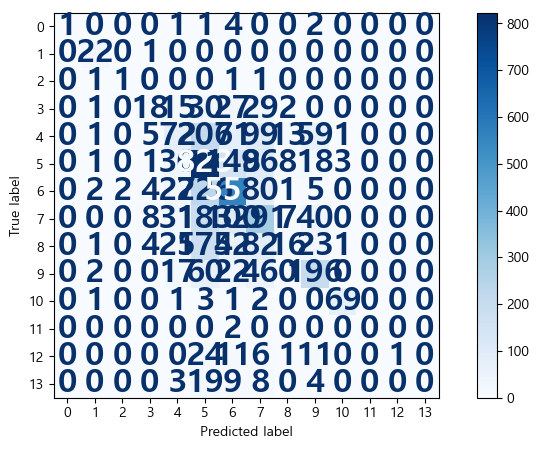


[변수 중요도]


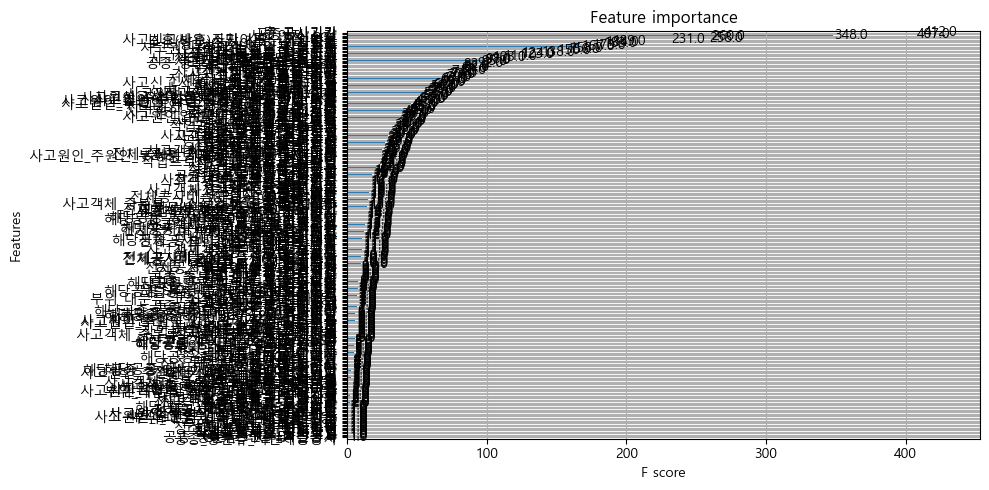

+------------------------------------------------+---------+-------------+-----------+
|                                                |   score |        rate |    cumsum |
|------------------------------------------------+---------+-------------+-----------|
| 총_공사기간                                    |     412 |   0.0456206 | 0.0456206 |
| 공종공사기간                                   |     407 |    0.045067 | 0.0906876 |
| 사고인지 시간                                  |     348 |   0.0385339 |  0.129222 |
| PC1                                            |     260 |   0.0287897 |  0.158011 |
| 사고신고사유_사망_사망 내용 없음               |     258 |   0.0285683 |   0.18658 |
| 보호(방호)조치여부 - 개인방호                  |     231 |   0.0255786 |  0.212158 |
| 풍향                                           |     189 |   0.0209279 |  0.233086 |
| 공정률                                         |     184 |   0.0203743 |   0.25346 |
| 보호(방호)조치여부 - 안전방호                  |     183 |   0.0202635 |  0.273724 |
| 사고객체_대분류_기타   

In [57]:
model_single = my_xgb_classification(x_train,y_train,x_test,y_test, pr=False,roc=False,hist=False,learning_curve=False)

In [58]:
A = []
for i,v in enumerate(df4['인적사고'].value_counts().index):
    if i in [0,1,4,5,6]:A.append(v)
A

['넘어짐', '떨어짐', '부딪힘', '절단, 베임', '깔림']

In [59]:
# A = list(df4['인적사고'].value_counts().index[3:])
df5 = df4.query("인적사고 in @A")

In [60]:
x = my_dummies(df5.drop(['인적사고','기온','시간'],axis=1),'요일', '공휴일여부', '오전오후', 
       '공공/민간 구분', '날씨',  '공종_대분류', '공종_중분류', '사고객체_대분류',
       '사고객체_중분류', '작업프로세스', '장소_대분류', '장소_중분류', '부위_대분류', '부위_중분류',
       '사고원인_주원인', '사고신고사유_부상', '사고신고사유_사망', '사고신고사유_물적', '시', '전체공사비',
       '해당공종_공사비', '안전관리계획', '설계안전성검토')
y = my_labelling(df5[['인적사고']],'인적사고')


In [61]:
x.shape

(14194, 353)

In [62]:
x['인적사고'] = y

In [63]:
x_train,x_test,y_train,y_test = my_train_test_split(x,'인적사고')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((11355, 353), (2839, 353), (11355,), (2839,))

[교차검증 TOP5]
+----+-------------+--------------+-------------+----------------+--------------------+-------------+-----------------+---------+--------------------+-------------------+
|    |   subsample |   reg_lambda |   reg_alpha |   n_estimators |   min_child_weight |   max_depth |   learning_rate |   gamma |   colsample_bytree |   mean_test_score |
|----+-------------+--------------+-------------+----------------+--------------------+-------------+-----------------+---------+--------------------+-------------------|
|  0 |           1 |            7 |           1 |            200 |                  1 |           6 |             0.1 |       2 |                0.7 |            0.6369 |
|  1 |         0.5 |            5 |           1 |            200 |                  7 |           2 |             0.3 |       4 |                0.8 |          0.635579 |
|  2 |         0.5 |            9 |           1 |            100 |                  3 |           4 |             0.1 |       2 |    

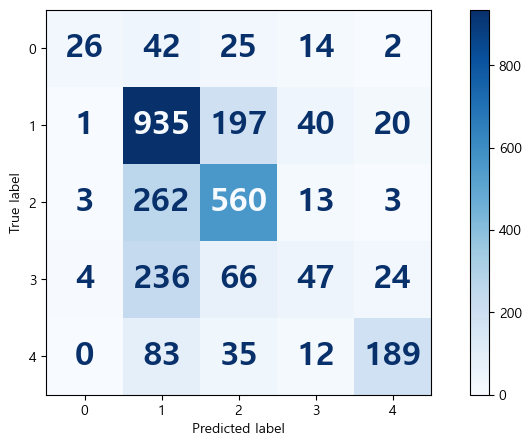


[변수 중요도]


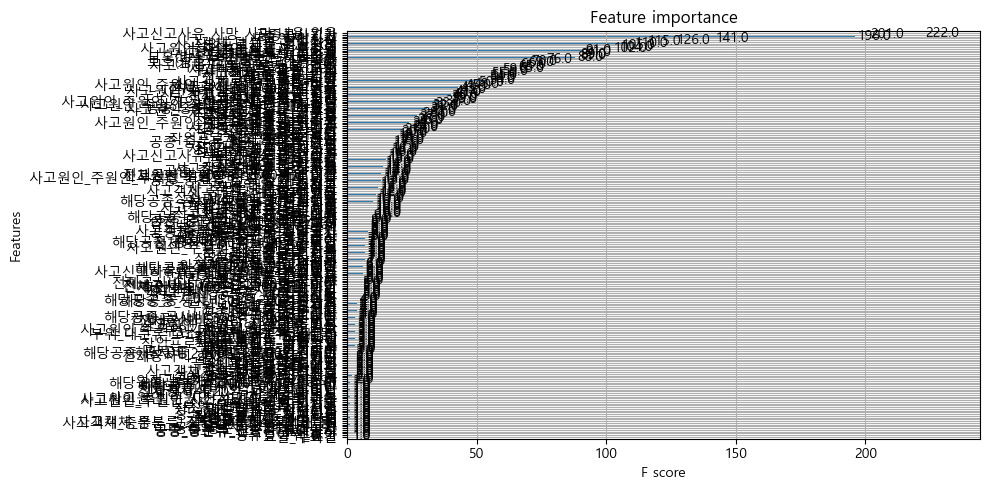

+------------------------------------------------+---------+-------------+-----------+
|                                                |   score |        rate |    cumsum |
|------------------------------------------------+---------+-------------+-----------|
| 사고신고사유_사망_사망 내용 없음               |     222 |   0.0466191 | 0.0466191 |
| 공종공사기간                                   |     201 |   0.0422092 | 0.0888282 |
| 총_공사기간                                    |     196 |   0.0411592 |  0.129987 |
| 사고인지 시간                                  |     141 |   0.0296094 |  0.159597 |
| 작업자수                                       |     126 |   0.0264595 |  0.186056 |
| 사고객체_대분류_건설기계                       |     115 |   0.0241495 |  0.210206 |
| 작업프로세스_운반작업                          |     110 |   0.0230995 |  0.233305 |
| PC1                                            |     105 |   0.0220496 |  0.255355 |
| 사고원인_주원인_작업자 부주의                  |     104 |   0.0218396 |  0.277194 |
| 작업프로세스_절단작업            

In [64]:
model_sep1 = my_xgb_classification(x_train,y_train,x_test,y_test, pr=False,roc=False,hist=False,learning_curve=False)

In [65]:
A = []
for i,v in enumerate(df4['인적사고'].value_counts().index):
    if i in [2,3,7,8,9,10,11,12,13,14]:A.append(v)
A

['물체에 맞음', '끼임', '질병', '찔림', '화상', '교통사고', '감전', '기타', '질식']

In [66]:
# A = list(df4['인적사고'].value_counts().index[3:])
df5 = df4.query("인적사고 in @A")

In [67]:
x = my_dummies(df5.drop(['인적사고','기온','시간'],axis=1),'요일', '공휴일여부', '오전오후', 
       '공공/민간 구분', '날씨',  '공종_대분류', '공종_중분류', '사고객체_대분류',
       '사고객체_중분류', '작업프로세스', '장소_대분류', '장소_중분류', '부위_대분류', '부위_중분류',
       '사고원인_주원인', '사고신고사유_부상', '사고신고사유_사망', '사고신고사유_물적', '시', '전체공사비',
       '해당공종_공사비', '안전관리계획', '설계안전성검토')
y = my_labelling(df5[['인적사고']],'인적사고')


In [68]:
x.shape

(7180, 352)

In [69]:
x['인적사고'] = y

In [70]:
x_train,x_test,y_train,y_test = my_train_test_split(x,'인적사고')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5744, 352), (1436, 352), (5744,), (1436,))

[교차검증 TOP5]
+----+-------------+--------------+-------------+----------------+--------------------+-------------+-----------------+---------+--------------------+-------------------+
|    |   subsample |   reg_lambda |   reg_alpha |   n_estimators |   min_child_weight |   max_depth |   learning_rate |   gamma |   colsample_bytree |   mean_test_score |
|----+-------------+--------------+-------------+----------------+--------------------+-------------+-----------------+---------+--------------------+-------------------|
|  0 |           1 |            7 |           1 |            200 |                  1 |           6 |             0.1 |       2 |                0.7 |          0.622911 |
|  1 |         0.5 |            9 |           1 |            100 |                  3 |           4 |             0.1 |       2 |                0.7 |          0.619081 |
|  2 |           1 |            5 |           1 |            300 |                  9 |           6 |             0.5 |       3 |    

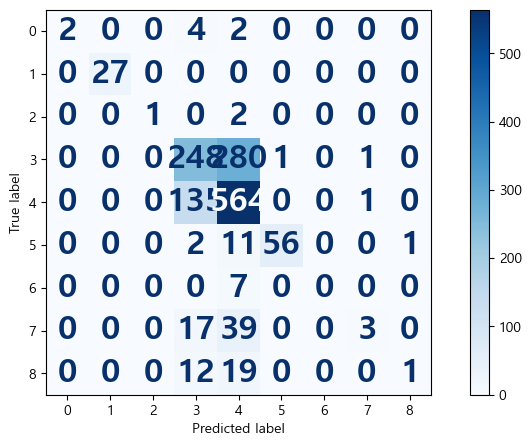


[변수 중요도]


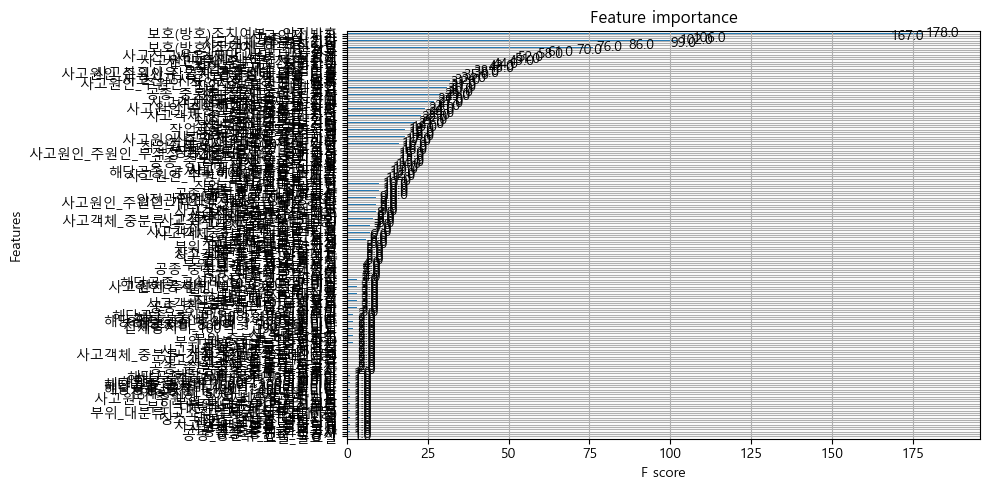

+------------------------------------------------+---------+-------------+-----------+
|                                                |   score |        rate |    cumsum |
|------------------------------------------------+---------+-------------+-----------|
| 보호(방호)조치여부 - 안전방호                  |     178 |   0.0652015 | 0.0652015 |
| 사고인지 시간                                  |     167 |   0.0611722 |  0.126374 |
| 공종공사기간                                   |     106 |   0.0388278 |  0.165201 |
| 사고객체_대분류_기타                           |     102 |   0.0373626 |  0.202564 |
| 총_공사기간                                    |      99 |   0.0362637 |  0.238828 |
| 사고객체_대분류_질병                           |      86 |   0.0315018 |   0.27033 |
| 보호(방호)조치여부 - 개인방호                  |      76 |   0.0278388 |  0.298168 |
| PC1                                            |      70 |    0.025641 |   0.32381 |
| 공정률                                         |      61 |   0.0223443 |  0.346154 |
| 사고신고사유_사망_사망 내용 

In [71]:
model_sep2 = my_xgb_classification(x_train,y_train,x_test,y_test, pr=False,roc=False,hist=False,learning_curve=False)

In [72]:
x = my_dummies(df4.drop(['인적사고','기온','시간'],axis=1),'요일', '공휴일여부', '오전오후', 
       '공공/민간 구분', '날씨',  '공종_대분류', '공종_중분류', '사고객체_대분류',
       '사고객체_중분류', '작업프로세스', '장소_대분류', '장소_중분류', '부위_대분류', '부위_중분류',
       '사고원인_주원인', '사고신고사유_부상', '사고신고사유_사망', '사고신고사유_물적', '시', '전체공사비',
       '해당공종_공사비', '안전관리계획', '설계안전성검토')
y = my_labelling(df4[['인적사고']],'인적사고')
x['인적사고'] = y

In [73]:
x_train,x_test,y_train,y_test = my_train_test_split(x,'인적사고')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17099, 354), (4275, 354), (17099,), (4275,))

In [74]:
model_single.score(x_train, y_train), model_single.score(x_test, y_test)

(0.5159950874320136, 0.48374269005847953)

In [75]:
result_df = pd.DataFrame()
result_df.loc[0, 'Train_acc'] = model_single.score(x_train, y_train)
result_df.loc[0, 'Test_acc'] = model_single.score(x_test, y_test)
result_df.loc[0, 'Type'] = 'Single'

In [76]:
A = []
for i,v in enumerate(df4['인적사고'].value_counts().index):
    if i in [0,1,4,5,6]:A.append(v)
A

['넘어짐', '떨어짐', '부딪힘', '절단, 베임', '깔림']

In [77]:
# A = list(df4['인적사고'].value_counts().index[3:])
df5 = df4.query("인적사고 in @A")

In [78]:
x = my_dummies(df5.drop(['인적사고','기온','시간'],axis=1),'요일', '공휴일여부', '오전오후', 
       '공공/민간 구분', '날씨',  '공종_대분류', '공종_중분류', '사고객체_대분류',
       '사고객체_중분류', '작업프로세스', '장소_대분류', '장소_중분류', '부위_대분류', '부위_중분류',
       '사고원인_주원인', '사고신고사유_부상', '사고신고사유_사망', '사고신고사유_물적', '시', '전체공사비',
       '해당공종_공사비', '안전관리계획', '설계안전성검토')
y = my_labelling(df5[['인적사고']],'인적사고')


In [80]:
x['인적사고'] = y

In [81]:
x_train,x_test,y_train,y_test = my_train_test_split(x,'인적사고')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((11355, 353), (2839, 353), (11355,), (2839,))

In [82]:
model_sep1.score(x_train, y_train), model_sep1.score(x_test, y_test)

(0.6661382650814619, 0.618879887284255)

In [92]:
result_df.loc[1, 'Train_acc'] = model_sep1.score(x_train, y_train)
result_df.loc[1, 'Test_acc'] = model_sep1.score(x_test, y_test)
result_df.loc[1, 'Type'] = 'Seperated_1'

In [84]:
A = []
for i,v in enumerate(df4['인적사고'].value_counts().index):
    if i in [2,3,7,8,9,10,11,12,13,14]:A.append(v)
A

['물체에 맞음', '끼임', '질병', '찔림', '화상', '교통사고', '감전', '기타', '질식']

In [85]:
# A = list(df4['인적사고'].value_counts().index[3:])
df5 = df4.query("인적사고 in @A")

In [86]:
x = my_dummies(df5.drop(['인적사고','기온','시간'],axis=1),'요일', '공휴일여부', '오전오후', 
       '공공/민간 구분', '날씨',  '공종_대분류', '공종_중분류', '사고객체_대분류',
       '사고객체_중분류', '작업프로세스', '장소_대분류', '장소_중분류', '부위_대분류', '부위_중분류',
       '사고원인_주원인', '사고신고사유_부상', '사고신고사유_사망', '사고신고사유_물적', '시', '전체공사비',
       '해당공종_공사비', '안전관리계획', '설계안전성검토')
y = my_labelling(df5[['인적사고']],'인적사고')


In [87]:
x['인적사고'] = y

In [88]:
x_train,x_test,y_train,y_test = my_train_test_split(x,'인적사고')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5744, 352), (1436, 352), (5744,), (1436,))

In [89]:
model_sep2.score(x_train, y_train), model_sep2.score(x_test, y_test)

(0.6716573816155988, 0.628133704735376)

In [93]:
result_df.loc[2, 'Train_acc'] = model_sep2.score(x_train, y_train)
result_df.loc[2, 'Test_acc'] = model_sep2.score(x_test, y_test)
result_df.loc[2, 'Type'] = 'Seperated_2'

In [94]:
result_df

,Train_acc,Test_acc,Type
0,0.515995,0.483743,Single
1,0.666138,0.618880,Seperated_1
2,0.671657,0.628134,Seperated_2


In [100]:
result_df2 = result_df.melt(id_vars = 'Type', value_vars = ['Train_acc', 'Test_acc'])
result_df2

,Type,variable,value
0,Single,Train_acc,0.515995
1,Seperated_1,Train_acc,0.666138
2,Seperated_2,Train_acc,0.671657
3,Single,Test_acc,0.483743
4,Seperated_1,Test_acc,0.618880
5,Seperated_2,Test_acc,0.628134


In [98]:
import seaborn as sns

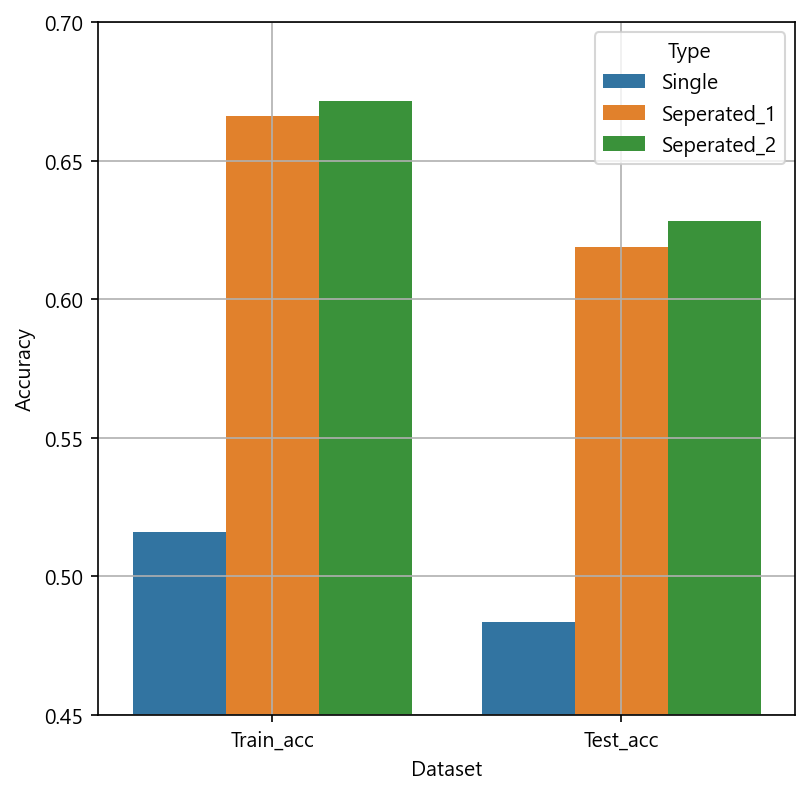

In [103]:
plt.figure(figsize = (6, 6), dpi = 150)
sns.barplot(data = result_df2, y = 'value', x = 'variable', hue = 'Type')
plt.grid()
plt.ylabel("Accuracy")
plt.xlabel("Dataset")
plt.ylim((0.45, 0.7))
plt.show()